<a href="https://colab.research.google.com/github/SohailaDiab/365-Days-of-AI/blob/main/Week2_CarPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning for Regression

In [496]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Data preparation

In [497]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [498]:
!wget $data

--2022-09-29 18:29:52--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.5’

data.csv.5          100%[===================>]   1.41M  --.-KB/s    in 0.06s   

2022-09-29 18:29:52 (25.5 MB/s) - ‘data.csv.5’ saved [1475504/1475504]



In [499]:
df = pd.read_csv('data.csv')

In [500]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


We can see that the column headings aren't ideal since they are not lowercase and there are spaces.

The values are also inconsistent so we will need to change the string values to lowercase

In [501]:
# Make the column names in lowercase and change spaces to underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [502]:
# Get the column names that are of type object (string)
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [503]:
# Loop over the column names in `strings` and access these columns
# in the df to change the values to lowercase and no spaces
for column in strings:
  df[column] = df[column].str.lower().str.replace(' ', '_')

In [504]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


The data now looks cleaner

# 2. Exploratory Data Analysis

In [505]:
# First 5 unique values and number of unique values for each column
for col in df.columns:
  print(col)
  print(f'First 5 unique values: {df[col].unique()[:5]}')
  print(f'Number of unique values: {df[col].nunique()}\n')

make
First 5 unique values: ['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
Number of unique values: 48

model
First 5 unique values: ['1_series_m' '1_series' '100' '124_spider' '190-class']
Number of unique values: 914

year
First 5 unique values: [2011 2012 2013 1992 1993]
Number of unique values: 28

engine_fuel_type
First 5 unique values: ['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
Number of unique values: 10

engine_hp
First 5 unique values: [335. 300. 230. 320. 172.]
Number of unique values: 356

engine_cylinders
First 5 unique values: [ 6.  4.  5.  8. 12.]
Number of unique values: 9

transmission_type
First 5 unique values: ['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
Number of unique values: 5

driven_wheels
First 5 unique values: ['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
Number of unique values: 4

number_of_doors
First 5 unique values: [ 2. 

### Distribution of msrp (price)

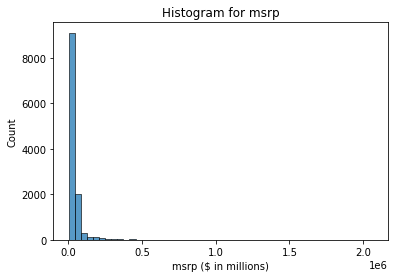

In [506]:
sns.histplot(df.msrp, bins=50)
plt.title('Histogram for msrp')
plt.xlabel('msrp ($ in millions)');

This type of distribution is called **Long Tail Distribution**.

Let's zoom in the histogram to see it a bit clearer.

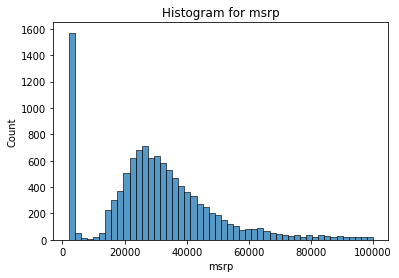

In [507]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)
plt.title('Histogram for msrp')
plt.xlabel('msrp');

The peak cost of cars is $1000. The reason could possibly be that this is the lowest value that is possible to put in the platform.

The average would be about $25,000

This kind of distribution is not really good for ML (the tail will confuse the model).

To get rid of this long tail, we will apply **logarithmic distribution** to get more compact values

### Logarithmic distribution

Since we cannot apply the log function to 0 (undefined), we will add 1 to each value to be sure that there are no 0s.

>`np.log([0+1, 1+1, 10+1, 1000+1, 100000+1])`

>output:
`array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])`

A NumPy function adds 1s manually, called `np.log1p()`

In [508]:
# Apply logarithmic dist. to msrp
price_logs = np.log1p(df.msrp)

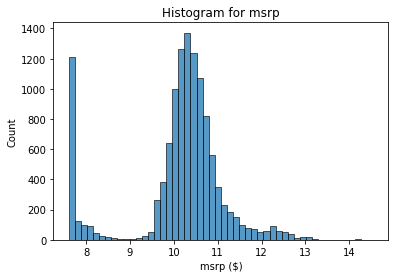

In [509]:
sns.histplot(price_logs, bins=50)
plt.title('Histogram for msrp')
plt.xlabel('msrp ($)');

The tail is now gone and we can visualize it better.

The bell curve shape represents normal distribution.

### Missing values

In [510]:
# Number of missing values for each column
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# 3. Setting up the validation framework

### Shuffle and split the dataset

We will split the dataset into 3 parts:

- **Train:** 60%
- **Validation:** 20%
- **Test:** 20%

We will do it manually without using a library for it

In [511]:
# Size of whole dataset
n = len(df)

n_val = int(n*0.2) # Validation set size
n_test= int(n*0.2) # Test set size
n_train = n - n_val - n_test # Train set size

n_train, n_val, n_test

(7150, 2382, 2382)

In [512]:
np.random.seed(2)
# Generate the indices
idx = np.arange(n)
# Shuffle indices
np.random.shuffle(idx)
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

In [513]:
# Split the dataset
df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
df_val = df.iloc[idx[n_train : n_train+n_val]].reset_index(drop=True)
df_test = df.iloc[idx[n_train+n_val:]].reset_index(drop=True)

In [514]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

### Apply log transformation to target variable y (msrp)

In [515]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

y_test

array([ 7.60140233,  8.07464908, 10.34563811, ..., 10.27852782,
       10.00789261, 10.40414162])

### Remove target variable from dataframe


In [516]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

This is to avoid using it as a feature

# 4. Linear Regression

Linear regression is a model that is used to solve **regression** problems. 

The output of the model is a number.

``g(X) ≈ y``

* g-> Model *(Linear regression)*
* X -> Feature matrix 
* y -> Target vector

The LR formula is the sum of the bias term w0
``g(xi) = w0 + w1⋅xi1 + w2⋅xi2 + w3⋅xi3 + ...``

w0 -> bias term (prediction we make without knowing anything about the features)

wi -> weight for each feature

***Compact generalized form:***

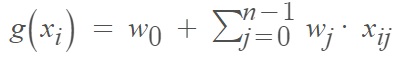



## 4.1 Mock code implementation

In [517]:
xi = [453, 11, 86] # feature vector for car i
w0 = 7.17 # bias term
w = [0.01, 0.04, 0.002] # weights vector

In [518]:
def LinearRegression(xi):
  n = len(xi) # length of feature and weights vector

  pred = w0

  for j in range(n):
    pred += w[j] * xi[j]
  return pred

In [519]:
# Prediction

# To undo the logarithm we did before (np.log1p())
np.expm1(LinearRegression(xi))

222347.2221101062

## 4.2 Vector form

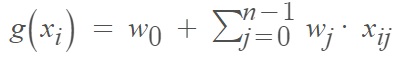

More compact annotation:

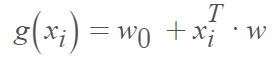

In [520]:
# Dot product (vector-vector multiplication)
def dot(xi, w):
  n = len(xi) # length of feature and weights vector
  res = 0.0

  for j in range(n):
    res += xi[j]*w[j]

  return res

In [521]:
def LinearRegression(xi):
  return w0 + dot(xi, w)

In [522]:
# Add w0 in the Linear Regression function, by making w vector start with w0
# and xi vector start with 1, since w0*1 = w0

w_new = [w0] + w 

def LinearRegression(xi):
  xi = [1] + xi
  return dot(xi, w_new)

In [523]:
LinearRegression(xi)

12.312

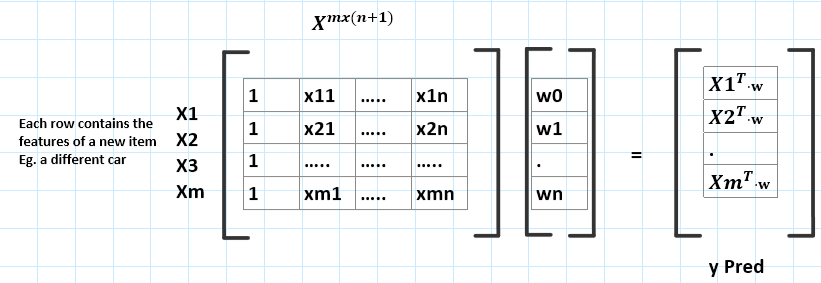

To apply Linear Regression to get `ypred`:

Multiply matrix `X` with vector `w`

In [524]:
w0 = 7.17 # bias term
w = [0.01, 0.04, 0.002] # weights vector
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [525]:
# 3 different observations
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

# Feature matrix
X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [526]:
# Now multiply the X matrix and w vector 
# to get the prediction for each of the 3 cars
def LinearRegression(X):
  return X.dot(w_new)

In [527]:
LinearRegression(X)

array([12.38 , 13.552, 12.312])

# 5. Training Linear Regression: Normal Equation



`Xw = y`

How to solve for `w` if inverse for `X` exists:
`w = X^-1 y`

**Issue:**

This `X` is usually a rectangular matrix, so for that matrix the **inverse does not exist**.

**Solution:**

We can find an approximate solution for this by multiplying by the **transpose of X**, giving us the **Gram Matrix** `XT X`: 

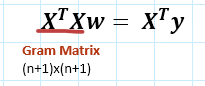



After that, we multiply by the inverse of the Gram Matrix:

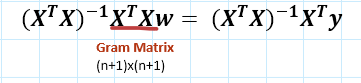

The Gram Matrix multiplied by its inverse becomes an identity matrix, so they cancel out:

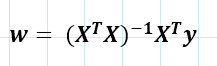

In [528]:
# Feature matrix
X = [   
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],
]
X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [529]:
# Bias term gives us the baseline 
# eg. how much a car should cost if we don't know anything about it)

# So, we need to add the bias term on the left of every vector in the X matrix
# Bias term here will be 1s
ones = np.ones(X.shape[0])

# Take add `ones` vector to the left of `X` column 
X = np.column_stack([ones, X])

In [530]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [531]:
# Gram Matrix
XTX = X.T.dot(X)
XTX

array([[9.000000e+00, 2.109000e+03, 2.300000e+02, 4.676000e+03],
       [2.109000e+03, 6.964710e+05, 4.411500e+04, 7.185400e+05],
       [2.300000e+02, 4.411500e+04, 7.146000e+03, 1.188030e+05],
       [4.676000e+03, 7.185400e+05, 1.188030e+05, 6.359986e+06]])

In [532]:
# Inverse Gram Matrix
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 3.30686958e+00, -5.39612291e-03, -6.21325581e-02,
        -6.61016816e-04],
       [-5.39612291e-03,  1.11633857e-05,  8.66973393e-05,
         1.08664195e-06],
       [-6.21325581e-02,  8.66973393e-05,  1.46189255e-03,
         8.57849603e-06],
       [-6.61016816e-04,  1.08664195e-06,  8.57849603e-06,
         3.60215866e-07]])

In [533]:
# Dot product between XTX and XTX_inv
XTX.dot(XTX_inv).round(1)

array([[ 1., -0.,  0.,  0.],
       [-0.,  1.,  0.,  0.],
       [-0.,  0.,  1.,  0.],
       [-0., -0.,  0.,  1.]])

We can see that this is an identity matrix

In [534]:
# all the weights
w_full = XTX_inv.dot(X.T).dot(y)
w_full

array([ 2.58447541e+04, -1.60890647e+01, -1.99472549e+02, -1.22802883e+00])

In [535]:
# Bias term
w0 = w_full[0]

# The rest of the weights
w = w_full[1:]

In [536]:
w0, w

(25844.754055766753, array([ -16.08906468, -199.47254894,   -1.22802883]))

Negative weights mean the price goes down as that certain feature increases in value.

## **Now let's put all of this into a function**

In [537]:
def train_linear_regression(X, y):
  '''
    inputs:
      X : Feature matrix
      y : Target values

    output:
      bias 
      vector of weights
  '''
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)

  return w_full[0], w_full[1:]

In [538]:
X, y

(array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
        [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
        [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
        [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
        [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
        [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
        [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
        [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
        [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]]),
 [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000])

In [539]:
# Feature matrix
X = [   
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],
]
X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [540]:
train_linear_regression(X, y)

(25844.754055766753, array([ -16.08906468, -199.47254894,   -1.22802883]))

# 6. Baseline Model for Car Price Prediction 

In [541]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [542]:
# Numerical features
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
# Extract values into a matrix
X_train = df_train[base].values
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]])

In [543]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

## Train

In [544]:
# Train
train_linear_regression(X_train, y_train)

(nan, array([nan, nan, nan, nan, nan]))

There are NaNs.. The reason is that there are missing values as you can see below:

In [545]:
df_train[base].isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [546]:
# Fill NaNs with 0
X_train = df_train[base].fillna(0).values

In [547]:
# Train again
w0, w = train_linear_regression(X_train, y_train)

## Predict

In [548]:
y_pred = w0 + X_train.dot(w)
y_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111])

## Plot predictions against target variables

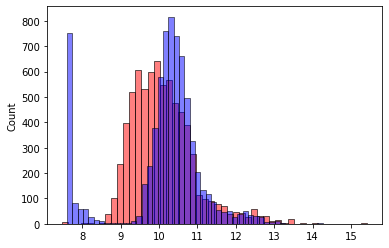

In [549]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50);

# 7. Evaluating Regression Models - RMSE

## Root Mean Squared Error

**Mean Squared Error:**
The sum of the difference between the prediction and actual value squared, divided by the number of predictions.

To find the **RMSE**, take the **root of MSE**.

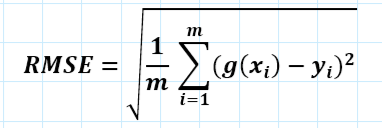

(g(xi) - yi)^2 -> squared difference

g(xi) -> prediction for xi

yi -> actual value

In [550]:
def rmse(y, y_pred):
  ''' 
    Find the RMSE (Root Mean Squared Error)

    input:
      y: actual values
      y_pred: prediction
    output:
      root mean squared error
  '''
  se = (y - y_pred) ** 2
  mse = se.mean()
  
  return np.sqrt(mse)

In [551]:
rmse(y_train, y_pred)

0.7554192603920132

# 8. Validating the model

Instead of finding the RMSE on training data, we should do so on validation data

In [552]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [553]:
# Prepare feature matrix

def prepare_X(df):
  # Selecting numerical columns
  df_num = df[base]
  # Filling missing values
  df_num = df_num.fillna(0)
  # Extracting the feature matrix np array
  X = df_num.values
  return X

In [554]:
# Training
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# Validation
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.761653099130156

# 9. Simple Feature Engineering

## Compute the age of the car instead of `year`

In [555]:
df_train.year.max() - df_train.year

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [556]:
df_train.year.max()

2017

In [557]:
# Prepare feature matrix



def prepare_X(df):
  # This function should not modify the original df we have, 
  # so we will work with a copy
  df = df.copy()

  # Add age column
  df['age'] = df.year.max() - df.year
  features = base + ['age']

  # Selecting numerical columns
  df_num = df[features]
  # Filling missing values
  df_num = df_num.fillna(0)
  # Extracting the feature matrix np array
  X = df_num.values
  return X

In [558]:
X_train = prepare_X(df_train)

In [559]:
# Training
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# Validation
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5172055461058299

We can see that the model improved (lower RMSE value)

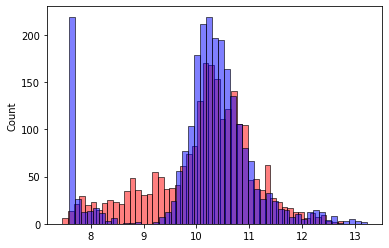

In [560]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50);

# 10. Categorical Variables

In [561]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

## Number of doors

The object (string) variables are categorical, but numerical values can be categorial as well, such as `number_of_doors` since it is distinct and not continuous.

The way to represent a categorical column such as `number_of_doors` is as multiple binary columns.

In [562]:
# Prepare feature matrix

def prepare_X(df):
  # This function should not modify the original df we have, 
  # so we will work with a copy
  df = df.copy()

  # Add age column
  features = base.copy()
  df['age'] = df.year.max() - df.year
  features.append('age')

  # Change `number of doors` to multiple binary columns
  for v in sorted(pd.unique(df['number_of_doors'][~np.isnan(df['number_of_doors'])]).astype('int')):
    df['num_doors_%s'%v] = (df.number_of_doors == v).astype('int')
    features.append('num_doors_%s'%v)

  # Selecting numerical columns
  df_num = df[features]
  # Filling missing values
  df_num = df_num.fillna(0)
  # Extracting the feature matrix np array
  X = df_num.values
  return X

In [563]:
# Training
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# Validation
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5157995641501678

## Car Makes

In [564]:
# Prepare feature matrix

def prepare_X(df):
  # This function should not modify the original df we have, 
  # so we will work with a copy
  df = df.copy()

  # Add age column
  features = base.copy()
  df['age'] = df.year.max() - df.year
  features.append('age')
  
  # Change `number of doors` to multiple binary columns
  for v in sorted(pd.unique(df['number_of_doors'][~np.isnan(df['number_of_doors'])]).astype('int')):
    df['num_doors_%s'%v] = (df.number_of_doors == v).astype('int')
    features.append('num_doors_%s'%v)

  # The most popular 5 makes of cars to binary columns
  makes = list(df.make.value_counts().head().index)
  for v in makes:
    df['make_%s'%v] = (df.make == v).astype('int')
    features.append('make_%s' %v)

  # Selecting numerical columns
  df_num = df[features]
  # Filling missing values
  df_num = df_num.fillna(0)
  # Extracting the feature matrix np array
  X = df_num.values
  return X

In [565]:
# Training
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# Validation
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5076038849556795

RMSE decreased by 1%

## Dealing with all categories

In [566]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [567]:
categorical_variables = [
    'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 
    'market_category', 'vehicle_size', 'vehicle_style'
]

In [568]:
# Dictionary with categorical variables
categories = {}

for c in categorical_variables:
  categories[c] = list(df[c].value_counts().head().index)

In [670]:
# Prepare feature matrix

def prepare_X(df):
  # This function should not modify the original df we have, 
  # so we will work with a copy
  df = df.copy()

  # Add age column
  df['age'] = df.year.max() - df.year
  features = base + ['age']  
  
  # Change `number of doors` to multiple binary columns
  for v in sorted(pd.unique(df['number_of_doors'][~np.isnan(df['number_of_doors'])]).astype('int')):
    df['num_doors_%s'%v] = (df.number_of_doors == v).astype('int')
    features.append('num_doors_%s'%v)
  
  # Change all categorical variables to binary columns
  for c, values in categories.items():
    for v in values:
      df['%s_%s'%(c, v)] = (df[c] == v).astype('int')
      features.append('%s_%s'%(c, v))

  # Selecting numerical columns
  df_num = df[features]
  # Filling missing values
  df_num = df_num.fillna(0)
  # Extracting the feature matrix np array
  X = df_num.values
  return X

In [671]:
# Training
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# Validation
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

85.39382195965916

In [672]:
w0, w

(-9997028153895118.0,
 array([-6.96947346e-01,  3.53869850e+01,  1.55017553e+00, -4.85296906e+00,
         3.62399332e-03, -3.42861199e+00,  3.90755479e+03,  3.84941660e+03,
         3.87626212e+03, -6.49863155e-01, -5.07631490e+00,  1.00996114e+00,
         3.30934628e+01,  1.00988816e+01, -5.70041743e+02, -5.14452192e+02,
        -5.43816371e+02, -5.50657469e+02, -5.91483075e+02,  3.42504994e+16,
         3.42504994e+16,  3.42504994e+16,  3.42504994e+16,  3.42504994e+16,
        -2.42534712e+16, -2.42534712e+16, -2.42534712e+16, -2.42534712e+16,
         1.51507180e+01,  1.43501133e+01,  2.95563861e+01,  6.43137968e+01,
        -2.63311261e+01,  7.64598334e+01,  9.41928586e+01,  8.92966808e+01,
        -4.85492239e-02,  5.44797374e-02,  1.78241160e-01,  3.41906701e-01,
        -1.64412078e-01]))

The RMSE is very high, we will know why that happened in the next section.

More about it [here](https://www.youtube.com/watch?v=91ve3EJlHBc&list=PL3MmuxUbc_hIhxl5Ji8t4O6lPAOpHaCLR&index=23)

# 11. Regularization

## Problem with Linear duplication


The inverse of a matrix does not exist if we have duplicate columns, therefore we would not be able to find the Gram Matrix.

In [673]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.0000001],
]

X = np.array(X)
X

array([[4.       , 4.       , 4.       ],
       [3.       , 5.       , 5.       ],
       [5.       , 1.       , 1.       ],
       [5.       , 4.       , 4.       ],
       [7.       , 5.       , 5.       ],
       [4.       , 5.       , 5.0000001]])

The 2nd and 3rd columns are almost the same, except for a very slight difference which is the last value

In [674]:
y = [1, 2, 3, 1, 2, 3]

In [675]:
XTX = X.T.dot(X)
XTX

array([[140.       , 111.       , 111.0000004],
       [111.       , 108.       , 108.0000005],
       [111.0000004, 108.0000005, 108.000001 ]])

In [676]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv.dot(X.T).dot(y)

array([ 2.73776578e-01, -4.41093100e+06,  4.41093113e+06])

Finding the inverse is not supposed to work here; however, since there is a very slight change in the values the program tries to find the inverse, resulting in either very large or very small values.

## The Solution - Regularization

Regularization here means controlling, so we control the weights so that they do not grow too much.

To solve this, we can add a small number to the diagonal of the `XTX` matrix

The reason it works is because by adding something on the diagonal we make sure that now it's less possible that a column is a duplicate of another column.

In [677]:
# Add small numbers to the diagonal
# The larger the numbers added to the diagonal, the more we have
# the weights under control
XTX = [
      [1, 2, 2],
      [2, 1, 1.0000001],
      [2, 1.0000001, 1],
]

XTX = np.array(XTX)
np.linalg.inv(XTX)

array([[-3.33333356e-01,  3.33333339e-01,  3.33333339e-01],
       [ 3.33333339e-01, -5.00000008e+06,  4.99999991e+06],
       [ 3.33333339e-01,  4.99999991e+06, -5.00000008e+06]])

In [678]:
# Adding XTX to identity matrix adds 1 to the diagonal
# multiply the identity matrix by a small number (it is a regularization parameter)
XTX = XTX + 0.01 * np.eye(3)

In [679]:
np.linalg.inv(XTX)

array([[ -0.33668908,   0.33501399,   0.33501399],
       [  0.33501399,  49.91590897, -50.08509104],
       [  0.33501399, -50.08509104,  49.91590897]])

Now we don't have that issue anymore

In [680]:
def train_linear_regression_reg(X, y, r=0.001):
  '''
    inputs:
      X : Feature matrix
      y : Target values
      r : Regularization parameter

    output:
      bias 
      vector of weights
  '''
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  XTX = XTX + r*np.eye(XTX.shape[0])

  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)

  return w_full[0], w_full[1:]

In [681]:
# Training
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

# Validation
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.4565219901382523

We can see RMSE here is much better than the RMSE without regularization.

# 12. Tuning the model
Finding the best regularization parameter.

We will use the validation set for it.

In [682]:
for r in [0.0, 0.00001, 0.0001,0.001, 0.1, 1, 10]:
  # Training
  X_train = prepare_X(df_train)
  w0, w = train_linear_regression_reg(X_train, y_train, r=r)

  # Validation
  X_val = prepare_X(df_val)
  y_pred = w0 + X_val.dot(w)

  score = rmse(y_val, y_pred)

  print(f'r parameter: {r},       w0: {w0},       RMSE: {score}')

r parameter: 0.0,       w0: -9997028153895118.0,       RMSE: 85.39382195965916
r parameter: 1e-05,       w0: -2.5197574150112447,       RMSE: 0.45651699218840697
r parameter: 0.0001,       w0: 6.31036643754584,       RMSE: 0.4565170637682569
r parameter: 0.001,       w0: 6.2852258235523,       RMSE: 0.456517508494148
r parameter: 0.1,       w0: 6.191208653420819,       RMSE: 0.45656927630296296
r parameter: 1,       w0: 5.634896668581476,       RMSE: 0.4572204317994219
r parameter: 10,       w0: 4.2839801089591205,       RMSE: 0.4701456932099694


In [683]:
# Training
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

# Validation
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.456517508494148

# 13. Using the model

In [684]:
# Concat the train and val datasets
df_full_train = pd.concat([df_train, df_val])

In [685]:
df_full_train = df_full_train.reset_index(drop=True)

In [686]:
X_full_train = prepare_X(df_full_train)
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

In [687]:
# Concat y train and y val
y_full_train = np.concatenate([y_train, y_val])

In [688]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

## Test

In [689]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)

rmse(y_test, y_pred)

0.4517749308921107

We can see that the model has almost the same score as before, which is a good sign because it means that it can generalize well.

# Predict on a random car

Turn it into dict, as if the data was extracted from the website.

In [700]:
car = df_test.iloc[28].to_dict()
car

{'make': 'audi',
 'model': 'tt_rs',
 'year': 2012,
 'engine_fuel_type': 'premium_unleaded_(required)',
 'engine_hp': 360.0,
 'engine_cylinders': 5.0,
 'transmission_type': 'manual',
 'driven_wheels': 'all_wheel_drive',
 'number_of_doors': 2.0,
 'market_category': 'factory_tuner,luxury,high-performance',
 'vehicle_size': 'compact',
 'vehicle_style': 'coupe',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 3105}

Turn the dict into a DataFrame 

In [701]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,audi,tt_rs,2012,premium_unleaded_(required),360.0,5.0,manual,all_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,25,18,3105


In [702]:
#################################################
categorical_columns = [
    'make', 'model', 'engine_fuel_type', 'driven_wheels', 'market_category',
    'vehicle_size', 'vehicle_style']

categorical = {}

for c in categorical_columns:
    categorical[c] = list(df_train[c].value_counts().head().index)
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df['year']
    features = base + ['age']

    for v in [2, 3, 4]:
        df['num_doors_%d' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%d' % v)

    for name, values in categorical.items():
        for value in values:
            df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
            features.append('%s_%s' % (name, value))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X
#################################################

In [703]:
X_small = prepare_X(df_small)

In [704]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

10.681780782276203

In [705]:
# Undo the logarithm to find the price
np.expm1(y_pred)

43554.04338181253

In [707]:
np.expm1(y_test[28])

56849.999999999956